<a href="https://colab.research.google.com/github/enjoyPG/2023Gifted/blob/main/students/jwoo428/Dreambooth_stable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

Tesla T4, 15360 MiB, 15101 MiB


In [2]:
%pip install -qq git+https://github.com/ShivamShrirao/diffusers
%pip install -q -U --pre triton
%pip install -q accelerate transformers ftfy bitsandbytes==0.35.0 gradio natsort safetensors xformers

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 109.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 8.

In [3]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please submit your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
For effortless bug reporting copy-paste your error into this form: https://docs.google.com/forms/d/e/1FAIpQLScPB8emS3Thkp66nvqwmjTEgxp8Y9ufuWTzFyr9kJ5AoI47dQ/viewform?usp=sf_link
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching /usr/local/cuda/lib64...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so
CUDA SETUP: Highest compute capability among GPUs detected: 7.5
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so...


/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/paths.py:105: UserWarning: /usr/lib64-nvidia did not contain libcudart.so as expected! Searching further paths...
  warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/paths.py:27: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/paths.py:27: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('8013'), PosixPath('http'), PosixPath('//172.28.0.1')}
  warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/paths.py:27: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('--logtostderr --listen_host=172.28.0.12 --target_host=172.28.0.12 --tunnel_background_save_url=http

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [4]:
print(pipe)

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.15.0.dev0",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}



In [5]:
pipe.safety_checker = lambda images, clip_input: (images, False)

In [6]:
!wget -q https://github.com/ShivamShrirao/diffusers/raw/main/examples/dreambooth/train_dreambooth.py
!wget -q https://github.com/ShivamShrirao/diffusers/raw/main/scripts/convert_diffusers_to_original_stable_diffusion.py

In [7]:
save_to_gdrive = True # Google Drive에 저장하고자 하는 경우 True로 설정

if save_to_gdrive:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
MODEL_NAME = "runwayml/stable-diffusion-v1-5"
OUTPUT_DIR = "stable_diffusion_weights/zxxzwx" # 새로운 모델을 학습할 때 이 부분을 고유한 문자열로 변경할 필요

if save_to_gdrive:
    OUTPUT_DIR = "/content/drive/MyDrive/" + OUTPUT_DIR
else:
    OUTPUT_DIR = "/content/" + OUTPUT_DIR

print("모델 출력(저장) 경로:", OUTPUT_DIR)

모델 출력(저장) 경로: /content/drive/MyDrive/stable_diffusion_weights/zxxzwx


In [9]:
!mkdir -p $OUTPUT_DIR

print(f"[*] Weights will be saved at {OUTPUT_DIR}")

[*] Weights will be saved at /content/drive/MyDrive/stable_diffusion_weights/zxxzwx


In [10]:
# 본 실습에서 사용할 학습 이미지 파일들의 경로 확인하기
!ls /content/drive/MyDrive/image/spaceship

'download (10).jpg'  'images (12).jpg'	   'images (23).jpg'  'images (35).jpg'
'download (1).jpg'   'images (13).jpg'	   'images (24).jpg'  'images (36).jpg'
'download (2).jpg'   'images (14).jpg'	   'images (25).jpg'  'images (37).jpg'
'download (3).jpg'   'images (15).jpg'	   'images (26).jpg'  'images (38).jpg'
'download (4).jpg'   'images (16).jpg'	   'images (27).jpg'  'images (3).jpg'
'download (5).jpg'   'images (17).jpg'	   'images (28).jpg'  'images (4).jpg'
'download (6).jpg'   'images (18)(1).jpg'  'images (29).jpg'  'images (5).jpg'
'download (7).jpg'   'images (18).jpg'	   'images (2).jpg'   'images (6).jpg'
'download (8).jpg'   'images (19).jpg'	   'images (30).jpg'  'images (7).jpg'
'download (9).jpg'   'images (1).jpg'	   'images (31).jpg'  'images (8).jpg'
 download.jpg	     'images (20).jpg'	   'images (32).jpg'  'images (9).jpg'
'images (10).jpg'    'images (21).jpg'	   'images (33).jpg'   images.jpg
'images (11).jpg'    'images (22).jpg'	   'images (34).jpg'


In [11]:
# 본 실습에서 사용할 학습 이미지 파일들의 경로 확인하기
!ls /content/drive/MyDrive/images/popularcar

In [12]:
concepts_list = [
    {
        "instance_prompt":      "photo of zxxzwx rocket",
        "class_prompt":         "photo of a rocket car",
        "instance_data_dir":    "/content/drive/MyDrive/image/popularcar",
        "class_data_dir":       "/content/drive/MyDrive/image/spaceship"
    }
]

# "class_data_dir" 폴더에서는 정규화된 이미지 정보를 가지고 있게 된다.
import json
import os
for c in concepts_list:
    os.makedirs(c["instance_data_dir"], exist_ok=True)

with open("concepts_list.json", "w") as f:
    json.dump(concepts_list, f, indent=4)

In [13]:
!python3 train_dreambooth.py \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --pretrained_vae_name_or_path="stabilityai/sd-vae-ft-mse" \
  --output_dir=$OUTPUT_DIR \
  --revision="fp16" \
  --with_prior_preservation --prior_loss_weight=1.0 \
  --seed=1234 \
  --resolution=512 \
  --train_text_encoder \
  --train_batch_size=1 \
  --mixed_precision="fp16" \
  --use_8bit_adam \
  --gradient_accumulation_steps=1 \
  --gradient_checkpointing \
  --learning_rate=1e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --num_class_images=40 \
  --sample_batch_size=4 \
  --max_train_steps=1000 \
  --save_interval=10000 \
  --save_sample_prompt="photo of zxxzwx rocket car" \
  --concepts_list="concepts_list.json"


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please submit your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
For effortless bug reporting copy-paste your error into this form: https://docs.google.com/forms/d/e/1FAIpQLScPB8emS3Thkp66nvqwmjTEgxp8Y9ufuWTzFyr9kJ5AoI47dQ/viewform?usp=sf_link
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/paths.py:105: UserWarning: /usr/lib64-nvidia did not contain libcudart.so as expected! Searching further paths...
  warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/paths.py:27: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/paths.py:27: UserWarning: WARNING: The following directories listed in your path wer

In [14]:
WEIGHTS_DIR = ""

if WEIGHTS_DIR == "":
    from natsort import natsorted
    from glob import glob
    import os
    WEIGHTS_DIR = natsorted(glob(OUTPUT_DIR + os.sep + "*"))[-1]

print(f"[*] WEIGHTS_DIR={WEIGHTS_DIR}")

[*] WEIGHTS_DIR=/content/drive/MyDrive/stable_diffusion_weights/zxxzwx/1000


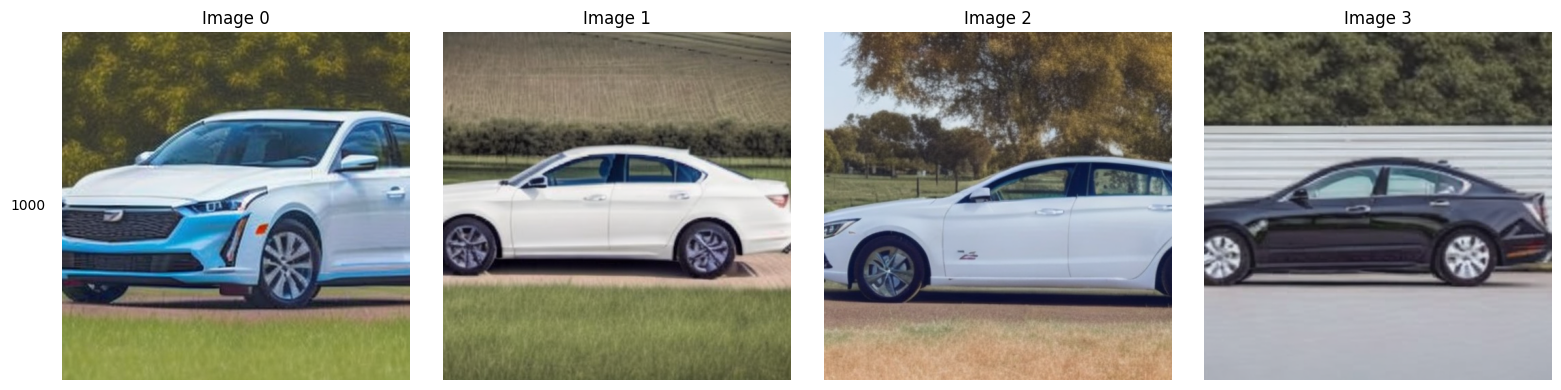

In [15]:
# 가장 마지막에 존재하는 모델 가중치(weights)로 생성된 이미지에 대하여 시각화(visualization) 수행
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 가중치들이 저장되는 출력 폴더 경로
weights_folder = OUTPUT_DIR
# 자신이 학습했던 모델 가중치 파일들을 하나씩 확인
folders = sorted([f for f in os.listdir(weights_folder) if f != "0"], key=lambda x: int(x))

# 학습된 모델(가중치 파일)의 개수
row = len(folders)
# 가중치별로 생성된 샘플(sample)의 개수
col = len(os.listdir(os.path.join(weights_folder, folders[0], "samples")))
# 저장할 이미지의 크기(scale)에 맞게 이미지 생성
scale = 4
fig, axes = plt.subplots(row, col, figsize=(col * scale, row * scale), gridspec_kw={'hspace': 0, 'wspace': 0})

# 하나씩 가중치 파일이 들어있는 폴더를 확인하며
for i, folder in enumerate(folders):
    folder_path = os.path.join(weights_folder, folder)
    image_folder = os.path.join(folder_path, "samples")
    # 현재의 모델로 생성한 이미지 파일 리스트
    images = [f for f in os.listdir(image_folder)]
    for j, image in enumerate(images):
        if row == 1:
            currAxes = axes[j]
        else:
            currAxes = axes[i, j]
        if i == 0:
            # 현재의 이미지에 대하여 제목(title) 기입
            currAxes.set_title(f"Image {j}")
        if j == 0:
            currAxes.text(-0.1, 0.5, folder, rotation=0, va='center', ha='center', transform=currAxes.transAxes)
        image_path = os.path.join(image_folder, image)
        img = mpimg.imread(image_path)
        currAxes.imshow(img, cmap='gray')
        currAxes.axis('off')

plt.tight_layout()
plt.savefig('grid.png', dpi=72)

In [16]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline, DDIMScheduler
from IPython.display import display

model_path = WEIGHTS_DIR

# 사전 학습된 모델 불러오기
pipe = StableDiffusionPipeline.from_pretrained(model_path, safety_checker=None, torch_dtype=torch.float16).to("cuda")
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe.enable_xformers_memory_efficient_attention()
g_cuda = None

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [17]:
g_cuda = torch.Generator(device='cuda')
seed = 9876 # 이미지 결과 reproducing을 위해 설정할 변수 값
g_cuda.manual_seed(seed)

  0%|          | 0/50 [00:00<?, ?it/s]

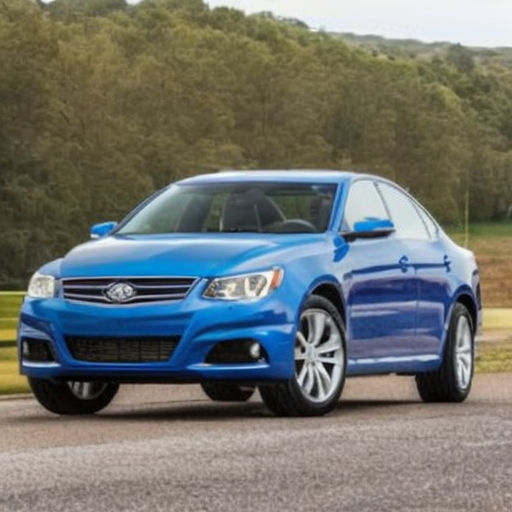

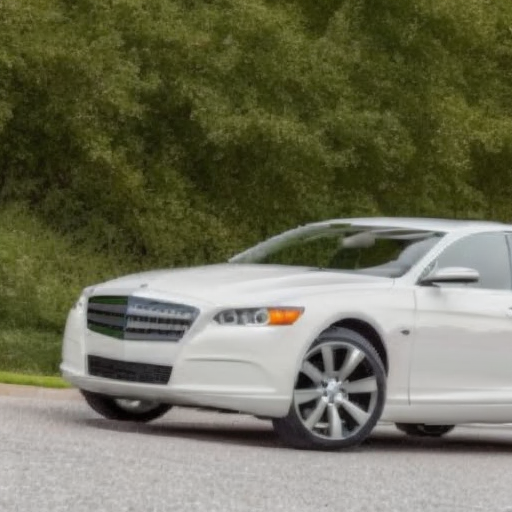

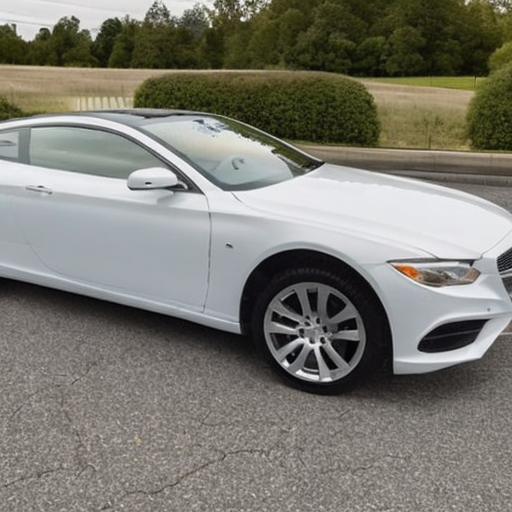

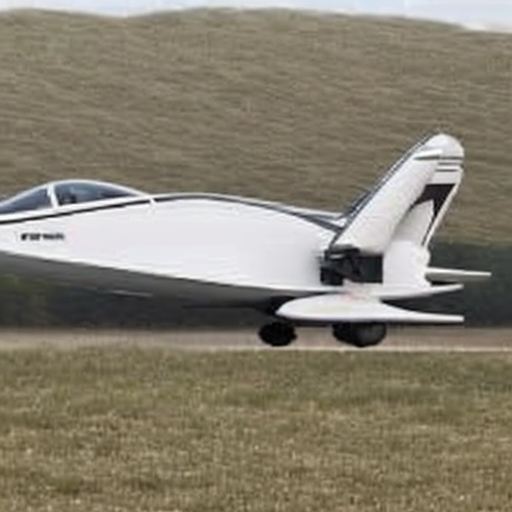

In [35]:
prompt = "photo of spaceship"
negative_prompt = "universe space"
num_samples = 4
guidance_scale = 7.5
num_inference_steps = 50
height = 512
width = 512

# 모델에 대하여 추론(inference) 모드를 설정한다.
with autocast("cuda"), torch.inference_mode():
    images = pipe(
        prompt,
        height=height,
        width=width,
        negative_prompt=negative_prompt,
        num_images_per_prompt=num_samples,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        generator=g_cuda
    ).images

for img in images:
    display(img)